In [2]:
print "h"

h


In [112]:
import os
import numpy as np

filename='numbers1.txt'
meas=np.loadtxt(filename)

print meas
print meas.ndim
print meas.shape

IOError: [Errno 2] No such file or directory: 'numbers1.txt'

In [19]:
time = meas[:,0]
print time

temperature =meas[:,1]
print temperature



[ 4.  5.]
[ 8.  9.]


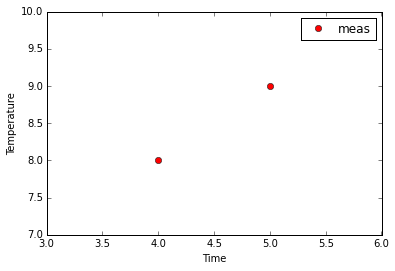

In [28]:
%matplotlib inline

import pylab as plt

plt.plot(time,temperature,'or',label="meas")
plt.xlim(3,6)
plt.ylim(7,10)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc=1,ncol=1,numpoints=1)

In [49]:
np.linspace()?

SyntaxError: invalid syntax (<ipython-input-49-2028c641ae21>, line 1)

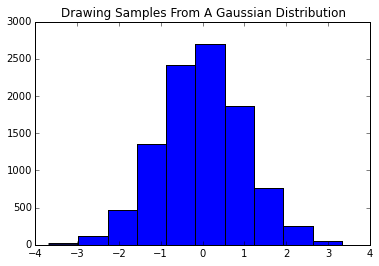

In [113]:
import random 

data=[]
ndatapts =10000

for i in range (0,ndatapts):
    data.append(np.random.normal())

plt.hist(data,bins=10)
plt.title("Drawing Samples From A Gaussian Distribution")
plt.show()

10000
[  2   2   0   1   1   4   1   4   3   7   2   2  13   5  14  15  18  15
  31  31  37  30  52  47  44  65  66  93  80  88 120 124 160 148 163 175
 152 160 199 195 228 228 247 249 259 254 254 304 276 276 274 273 255 274
 309 278 283 262 218 221 216 189 169 190 159 154 147 124 117 120  96 111
  83  69  67  58  54  37  38  32  39  19  26  18  12   8  15   8   6   5
   2   5   6   2   0   2   3   1   0   2]
[  1.99999995e-04   1.99999995e-04   0.00000000e+00   9.99999975e-05
   9.99999975e-05   3.99999990e-04   9.99999975e-05   3.99999990e-04
   3.00000014e-04   6.99999975e-04   1.99999995e-04   1.99999995e-04
   1.30000000e-03   5.00000024e-04   1.39999995e-03   1.50000001e-03
   1.79999997e-03   1.50000001e-03   3.10000009e-03   3.10000009e-03
   3.70000000e-03   3.00000003e-03   5.20000001e-03   4.69999993e-03
   4.39999998e-03   6.50000013e-03   6.59999996e-03   9.30000003e-03
   8.00000038e-03   8.79999995e-03   1.20000001e-02   1.24000004e-02
   1.60000008e-02   1.48000000e-02 

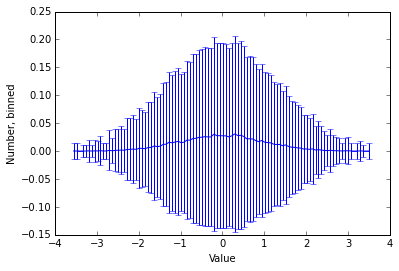

In [107]:
nbins=100
numbins,edges=np.histogram(data,bins=nbins)
print np.sum(numbins)
#print numbins
numbins=np.array(numbins,dtype='f')/np.sum(numbins)
#print numbins
#print  edges
#print edges[:-1]
vals=edges[:-1]+(edges[1]-edges[0])/2
print vals

plt.errorbar(vals,numbins,np.sqrt(numbins))
plt.xlabel("Value")
plt.ylabel("Number, binned")


Linspace() makes: [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]


<Container object of 3 artists>

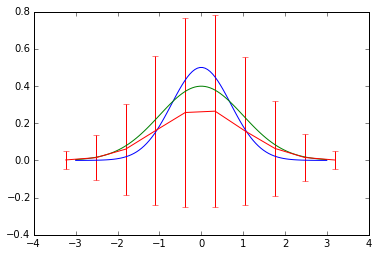

In [103]:
def g(x,a,b,c):
    return(a*np.exp(-((x-b)/c)**2))

def gt(x,a,p):
    return(a*(1/(1*np.sqrt(2*np.abs(p))))*np.exp(-((x-0)**2/(2*1**2))))

xvals= np.linspace(-3,3,100)

print "Linspace() makes: " +str(xvals[:10])

plt.plot(xvals,g(xvals,.5,0,1))
plt.plot(xvals,gt(xvals,1,3.14))
plt.errorbar(vals,numbins,np.sqrt(numbins))

In [105]:
from scipy.optimize import curve_fit

pars, covar=curve_fit(g,vals,numbins,p0=[20,0,.13])
tpars, tcovar=curve_fit(gt,vals,numbins,p0=[1,3.14])

print "What di curve_fit() find for g?"
print "Best fit paparmeters amplitude, mean value, and sigma" +str(pars)
print " and covariances:" +str(covar)

print "What did curve_fit() find for gt?"
print "Best fit paparmeters amplitude, mean value, and sigma" +str(tpars)
print " and covariances:" +str(tcovar)
#print "sd is "+np.sqrt(np.diag(tcovar))

What di curve_fit() find for g?
Best fit paparmeters amplitude, mean value, and sigma[  4.30825127e+01  -2.47532736e-02   1.57889392e-01]
 and covariances:[[  8.35561607e+17  -1.82447267e+12  -2.99056299e+14]
 [ -1.82447267e+12   3.98378826e+06   6.52997983e+08]
 [ -2.99056299e+14   6.52997983e+08   1.07035399e+11]]
What did curve_fit() find for gt?
Best fit paparmeters amplitude, mean value, and sigma[ 0.82943218  4.37970656]
 and covariances:[[  1.10847179e+11   1.17098795e+12]
 [  1.17098795e+12   1.23702992e+13]]


TypeError: cannot concatenate 'str' and 'numpy.ndarray' objects

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


IndexError: index 2 is out of bounds for axis 0 with size 2

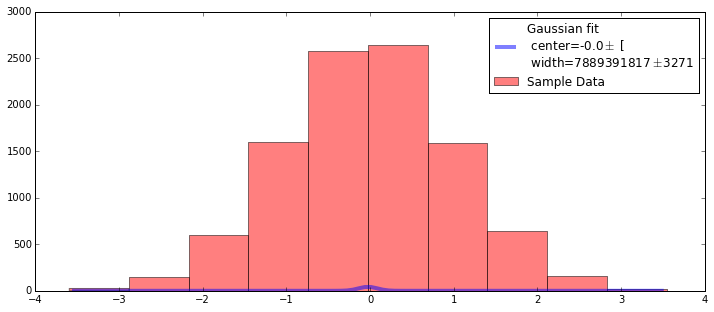

In [106]:
plt.figure(figsize=(12,5))

plt.hist(data,bins=nbins,color='r',alpha=.5,label="Sample Data")
x=np.linspace(min(vals)-.3,max(vals)+.3,100)

plt.plot(x,g(x,*pars),lw='4',alpha=.5, label='Gaussian fit\n center='+str(pars[1])[:4]+'$\\pm$ '+str(np.sqrt(covar[1]))[:3]+'\n width='+str(pars[2])[4:]+'$\\pm$'+str(np.sqrt(covar[2,2]))[:4])
plt.legend()
plt.plot(x,gt(x,*tpars),lw='4',alpha=.5, label='Real Gaussian fit\n center='+str(tpars[1])[:4]+'$\\pm$ '+str(np.sqrt(tcovar[1]))[:3]+'\n width='+str(tpars[2])[4:]+'$\\pm$'+str(np.sqrt(covar[2,2]))[:4])
plt.legend()